### Двух-факторный дисперсионный анализ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [38]:
df=pd.read_csv("../resources/atherosclerosis.csv")

In [16]:
df

,expr,age,dose
0,107.351478,1,D1
1,104.504438,1,D1
2,103.435134,1,D1
3,109.572882,1,D1
4,114.993803,1,D1
...,...,...,...
59,101.851582,2,D2
60,105.239530,2,D2
61,99.350198,2,D2
62,108.091455,2,D2


In [42]:
df.groupby(['age', 'dose']).describe()

expr                                                           \
         count        mean       std        min         25%         50%   
age dose                                                                  
1   D1    16.0  104.758464  5.863454  90.918788  102.769657  104.779105   
    D2    16.0  105.545864  4.369024  94.554612  104.343822  106.550749   
2   D1    16.0  101.004805  5.116310  90.970949   98.257464  100.912804   
    D2    16.0  102.273629  5.135374  94.180214   98.843173  101.875234   

                                  
                 75%         max  
age dose                          
1   D1    107.147066  114.993803  
    D2    107.736334  111.552090  
2   D1    104.012453  112.008916  
    D2    104.445248  111.639129

/usr/lib/python3/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/lib/python3/dist-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


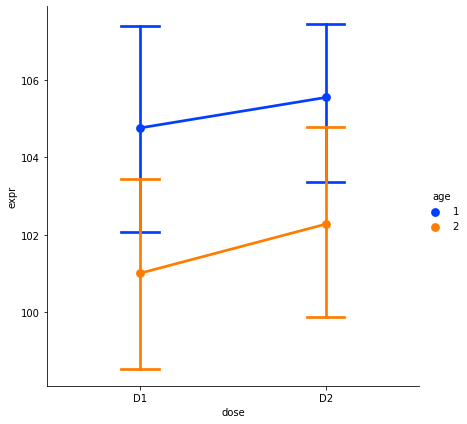

In [25]:
g = sns.factorplot(x="dose", y="expr", hue="age", data=df,
                   palette="bright",capsize=.2, size=6)
plt.show()

двухфакторный анализ через statsmodels

1 Вариант написания кода

In [32]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols(formula="expr ~ age*dose", data=df).fit()
res = sm.stats.anova_lm(model, typ= 2)
res

,sum_sq,df,F,PR(>F)
dose,16.912241,1.0,0.638094,0.427552
age,197.452754,1.0,7.449841,0.008313
age:dose,0.927077,1.0,0.034978,0.852272
Residual,1590.257424,60.0,NaN,NaN


2 Вариант написания кода

In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('expr ~ C(dose)*C(age)', df).fit()
res = sm.stats.anova_lm(model, typ= 2)
res

,sum_sq,df,F,PR(>F)
C(dose),16.912241,1.0,0.638094,0.427552
C(age),197.452754,1.0,7.449841,0.008313
C(dose):C(age),0.927077,1.0,0.034978,0.852272
Residual,1590.257424,60.0,NaN,NaN


3 вариант написания кода
https://www.marsja.se/three-ways-to-carry-out-2-way-anova-with-python/

               sum_sq  df          F      PR(>F)
age        197.452754   1    7.44984  0.00831345
dose        16.912241   1   0.638094    0.427552
age:dose     0.927077   1  0.0349784    0.852272
Residual  1590.257424  60        NaN         NaN


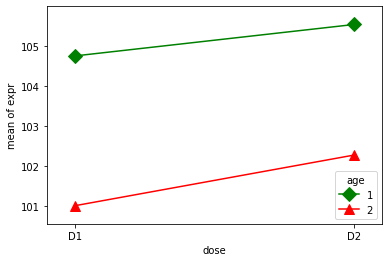

In [41]:
from statsmodels.graphics.factorplots import interaction_plot
from scipy import stats

fig=interaction_plot(df.dose,df.age,df.expr,colors=['green','red'], markers=['D','^'], ms=10)
#Степени свободы
N =  len(df.expr)
m1 = len(df.age.unique())
m2 = len(df.dose.unique())
df_a = m1 - 1
df_b = m2 - 1
df_axb = df_a*df_b 
df_w = N - m1*m2
#Общее среднее
grand_mean = df['expr'].mean()
#Суммы квадратов
ssq_a = sum([(df[df.age ==i].expr.mean()-grand_mean)**2 for i in df.age])
ssq_b = sum([(df[df.dose ==i].expr.mean()-grand_mean)**2 for i in df.dose])
ssq_t = sum((df.expr - grand_mean)**2)
spl_age=[df[df.age == i] for i in df.age.unique()]
age_means=[[x_age[x_age.dose == d].expr.mean() for d in x_age.dose] for x_age in spl_age]
ssq_w = sum([sum((spl_age[i].expr-age_means[i])**2) for i in range(len(df.age.unique()))])
ssq_axb = ssq_t-ssq_a-ssq_b-ssq_w
#Средние квадраты
ms_a = ssq_a/df_a
ms_b = ssq_b/df_b
ms_axb = ssq_axb/df_axb
ms_w = ssq_w/df_w
#F-значения
f_a = ms_a/ms_w
f_b = ms_b/ms_w
f_axb = ms_axb/ms_w
#P-значения
p_a = stats.f.sf(f_a, df_a, df_w)
p_b = stats.f.sf(f_b, df_b, df_w)
p_axb = stats.f.sf(f_axb, df_axb, df_w)
#результаты
results = {'sum_sq':[ssq_a, ssq_b, ssq_axb, ssq_w],
           'df':[df_a, df_b, df_axb, df_w],
           'F':[f_a, f_b, f_axb, 'NaN'],
            'PR(>F)':[p_a, p_b, p_axb, 'NaN']}
columns=['sum_sq', 'df', 'F', 'PR(>F)']
aov_table1 = pd.DataFrame(results, columns=columns,
                          index=['age', 'dose', 
                          'age:dose', 'Residual'])
print(aov_table1)
